In [71]:
#pip install opencv-python
#pip install tensorflow_datasets
#pip instlal matplotlib
#pip install tensorflow
#pip install pandas

import cv2
import matplotlib.pyplot as plt
import setuptools

import tensorflow_datasets as tfds
import tensorflow as tf

import numpy as np
import pandas as pd

In [72]:
import os
import sys
sys.setrecursionlimit(1000000000)
import warnings
warnings.filterwarnings('ignore')

In [73]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지 데이터 로더 생성
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# 훈련 데이터 로드
# 경로는 자기 PC에 맞게 수정해서 진행해야함
train_generator = train_datagen.flow_from_directory(
    'Z:\Dev\python\HDAT\dataset/cats_and_dogs_filtered/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

# 검증 데이터 로드
validation_generator = validation_datagen.flow_from_directory(
    'Z:\Dev\python\HDAT\dataset/cats_and_dogs_filtered/validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [74]:
# 이미지 한 개 출력
images, labels = next(train_generator)
len(images)

32

(-0.5, 149.5, 149.5, -0.5)

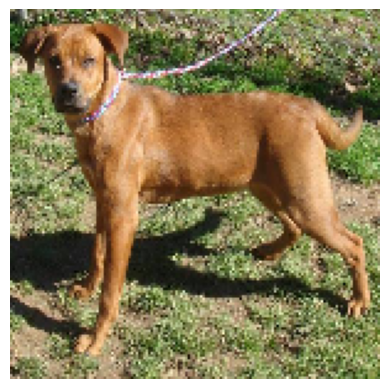

In [75]:
plt.imshow(images[30])
plt.axis('off')

In [83]:
resnet50_pre = tf.keras.applications.resnet.ResNet50(weights='imagenet', input_shape=(224, 224, 3))
resnet50_pre.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [84]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [85]:
def pred_img(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    img_resized = cv2.resize(img, (224,224))
    pred = resnet50_pre.predict(img_resized.reshape([1, 224,224, 3]))
    decoded_pred = decode_predictions(pred)

    for i, instance in enumerate(decoded_pred[0]):
        print('{}위: {} ({:.2f}%)'.format(i+1, instance[1], instance[2] * 100))


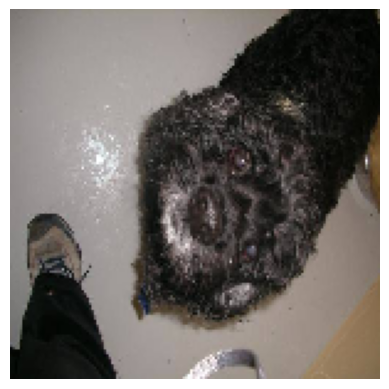

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1위: nematode (14.39%)
2위: cleaver (3.62%)
3위: oboe (3.25%)
4위: spatula (2.60%)
5위: hair_slide (2.23%)


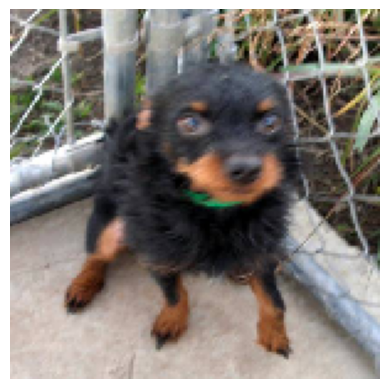

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1위: nematode (14.16%)
2위: cleaver (3.70%)
3위: oboe (3.55%)
4위: spatula (2.61%)
5위: ballpoint (2.32%)


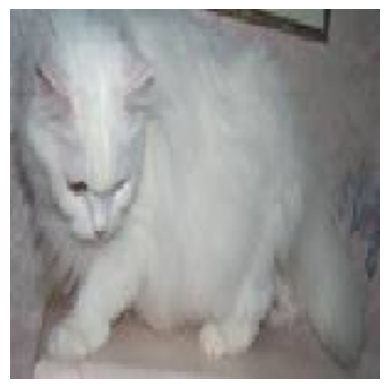

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1위: nematode (14.74%)
2위: cleaver (2.74%)
3위: oboe (2.55%)
4위: spatula (2.28%)
5위: matchstick (2.25%)


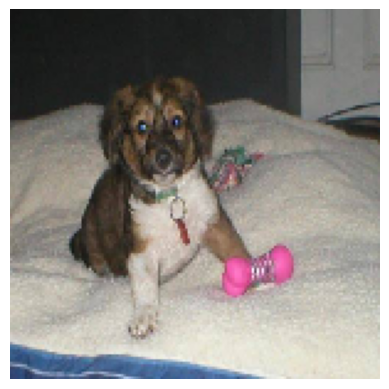

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1위: nematode (14.23%)
2위: cleaver (3.32%)
3위: oboe (3.02%)
4위: spatula (2.47%)
5위: hair_slide (2.20%)


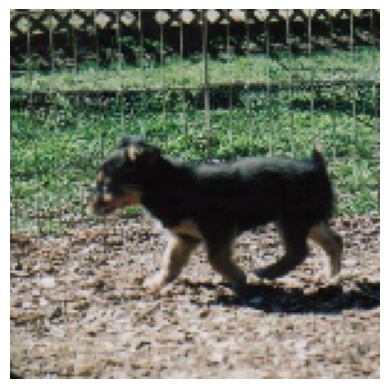

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1위: nematode (14.83%)
2위: cleaver (3.85%)
3위: oboe (3.22%)
4위: spatula (2.53%)
5위: ballpoint (2.24%)


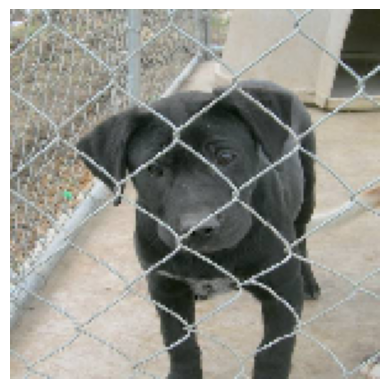

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1위: nematode (10.32%)
2위: cleaver (3.41%)
3위: matchstick (2.94%)
4위: oboe (2.82%)
5위: ballpoint (2.73%)


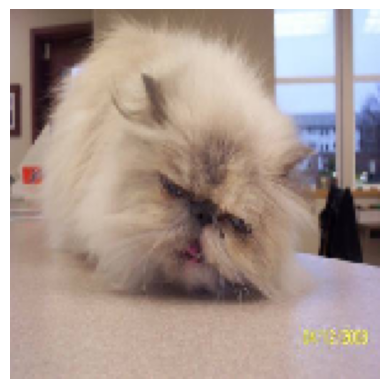

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1위: nematode (14.93%)
2위: cleaver (3.02%)
3위: oboe (2.94%)
4위: spatula (2.42%)
5위: hair_slide (2.23%)


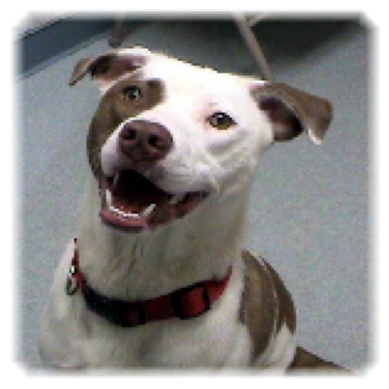

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1위: nematode (12.85%)
2위: cleaver (4.13%)
3위: oboe (3.27%)
4위: ballpoint (2.64%)
5위: spatula (2.52%)


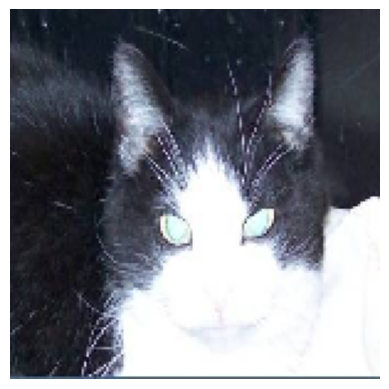

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1위: nematode (13.94%)
2위: cleaver (3.59%)
3위: oboe (3.42%)
4위: spatula (2.70%)
5위: hair_slide (2.22%)


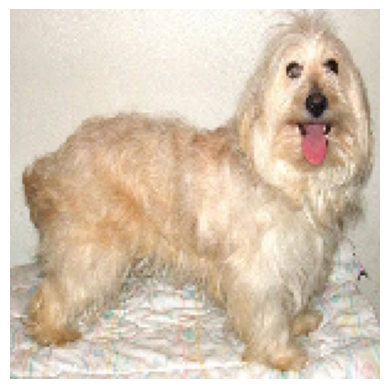

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1위: nematode (14.40%)
2위: cleaver (3.04%)
3위: oboe (2.80%)
4위: spatula (2.44%)
5위: hair_slide (2.16%)


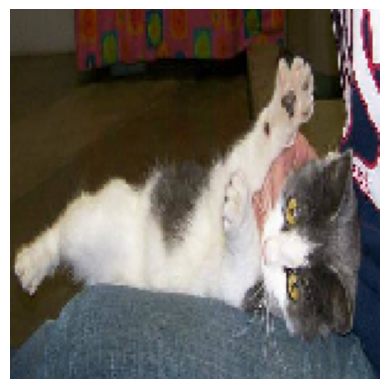

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1위: nematode (13.58%)
2위: cleaver (3.48%)
3위: oboe (3.11%)
4위: spatula (2.39%)
5위: ballpoint (2.25%)


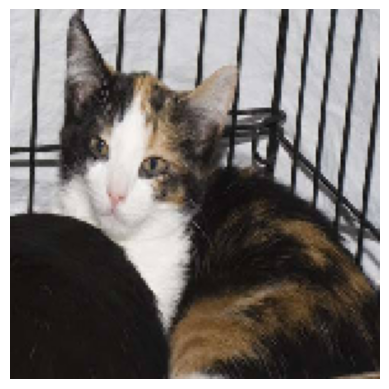

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1위: nematode (13.75%)
2위: cleaver (4.10%)
3위: oboe (3.68%)
4위: spatula (2.58%)
5위: ballpoint (2.50%)


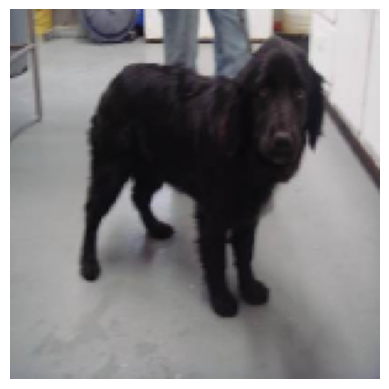

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1위: nematode (14.37%)
2위: cleaver (3.90%)
3위: oboe (3.46%)
4위: spatula (2.78%)
5위: hair_slide (2.28%)


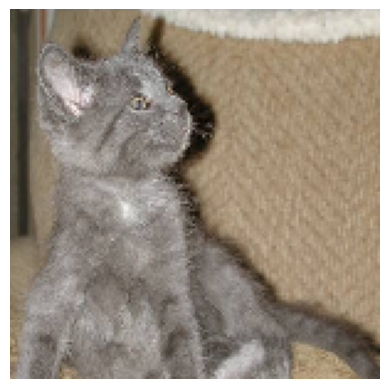

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1위: nematode (14.69%)
2위: cleaver (3.24%)
3위: oboe (2.97%)
4위: spatula (2.58%)
5위: hair_slide (2.28%)


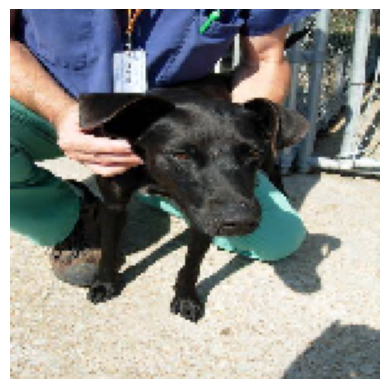

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1위: nematode (13.49%)
2위: cleaver (5.11%)
3위: oboe (3.56%)
4위: ballpoint (3.13%)
5위: nail (2.33%)


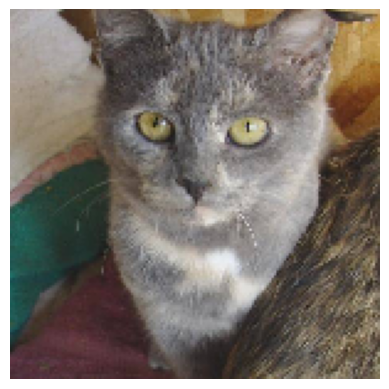

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1위: nematode (14.42%)
2위: cleaver (3.16%)
3위: oboe (2.95%)
4위: spatula (2.41%)
5위: hair_slide (2.23%)


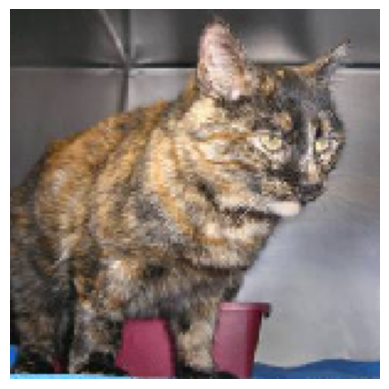

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1위: nematode (14.61%)
2위: cleaver (3.28%)
3위: oboe (3.19%)
4위: spatula (2.48%)
5위: hair_slide (2.27%)


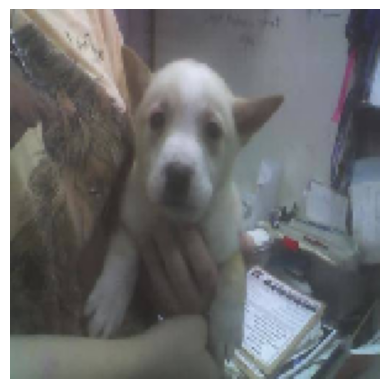

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1위: nematode (14.71%)
2위: cleaver (3.09%)
3위: oboe (2.88%)
4위: spatula (2.41%)
5위: nail (2.17%)


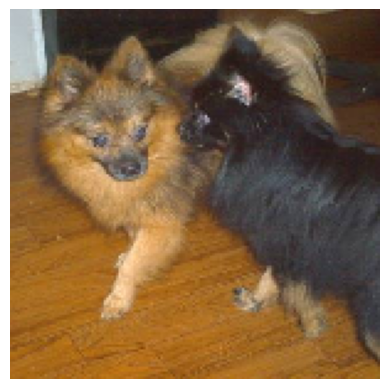

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1위: nematode (14.44%)
2위: cleaver (2.94%)
3위: oboe (2.74%)
4위: spatula (2.45%)
5위: hair_slide (2.16%)


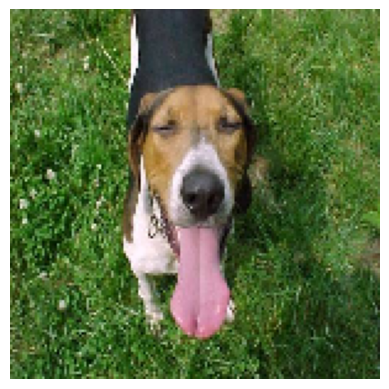

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1위: nematode (14.71%)
2위: cleaver (4.13%)
3위: oboe (4.00%)
4위: spatula (2.97%)
5위: hair_slide (2.19%)


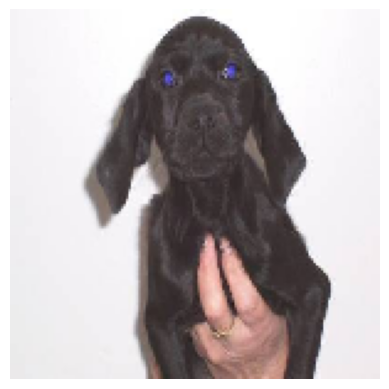

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1위: nematode (12.77%)
2위: cleaver (4.04%)
3위: oboe (3.90%)
4위: spatula (2.78%)
5위: ballpoint (2.53%)


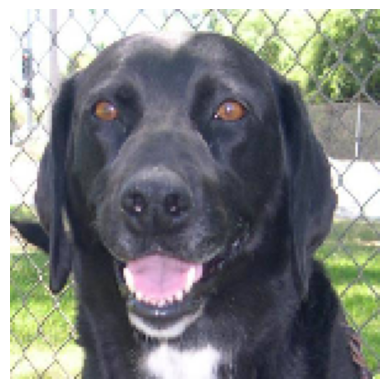

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1위: nematode (14.09%)
2위: cleaver (3.68%)
3위: oboe (3.28%)
4위: spatula (2.51%)
5위: ballpoint (2.39%)


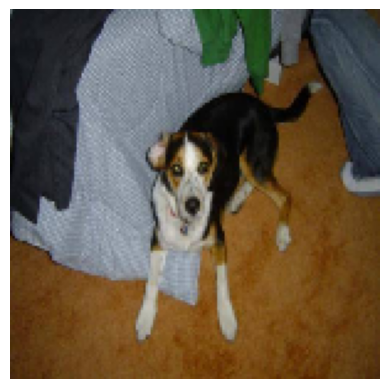

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1위: nematode (14.34%)
2위: cleaver (3.65%)
3위: oboe (3.40%)
4위: spatula (2.78%)
5위: hair_slide (2.35%)


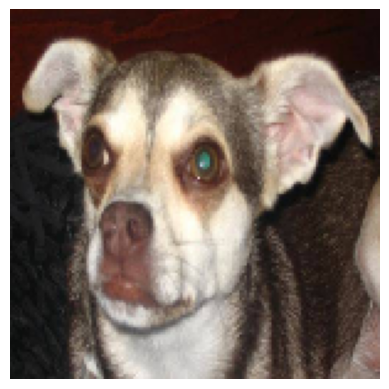

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1위: nematode (14.72%)
2위: cleaver (4.46%)
3위: oboe (4.24%)
4위: spatula (3.06%)
5위: ballpoint (2.47%)


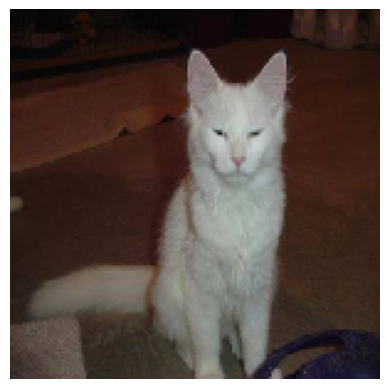

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1위: nematode (14.49%)
2위: cleaver (2.94%)
3위: oboe (2.84%)
4위: spatula (2.42%)
5위: hair_slide (2.17%)


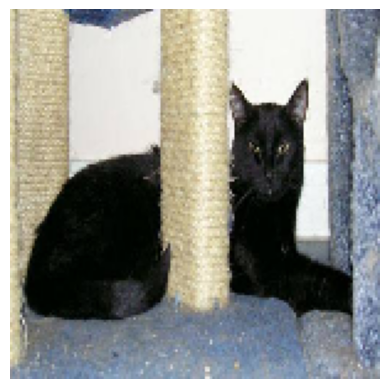

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1위: nematode (12.96%)
2위: oboe (4.99%)
3위: cleaver (4.98%)
4위: spatula (3.24%)
5위: bassoon (2.33%)


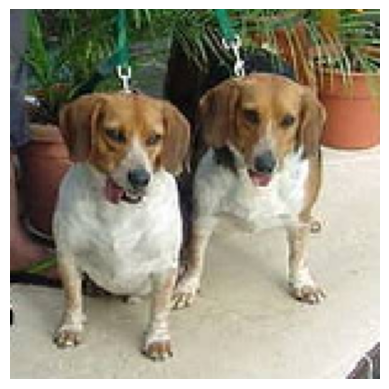

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1위: nematode (13.79%)
2위: cleaver (4.57%)
3위: oboe (3.84%)
4위: spatula (3.07%)
5위: hair_slide (2.41%)


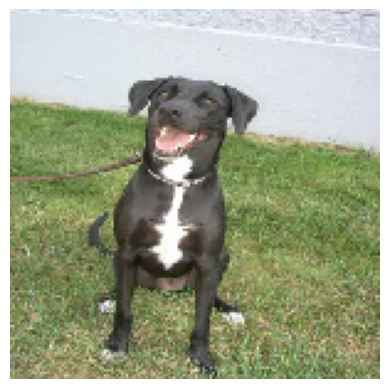

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1위: nematode (13.97%)
2위: cleaver (4.30%)
3위: oboe (3.40%)
4위: spatula (2.71%)
5위: hair_slide (2.18%)


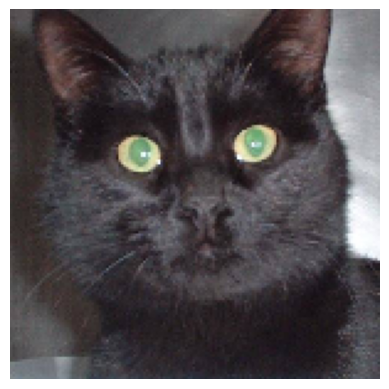

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1위: nematode (13.97%)
2위: cleaver (3.36%)
3위: oboe (3.18%)
4위: spatula (2.37%)
5위: nail (2.17%)


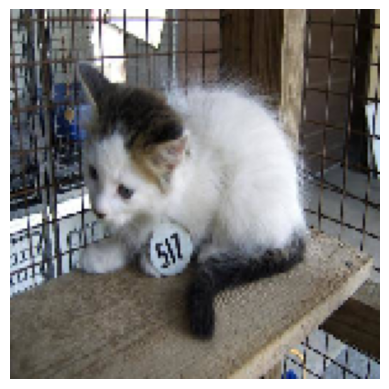

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1위: nematode (14.72%)
2위: cleaver (3.60%)
3위: oboe (3.32%)
4위: spatula (2.50%)
5위: hair_slide (2.14%)


In [88]:
#정확도 뭐지... 뭘잘못했는지 찾아야함!!!
for n in range(30):
    pred_img(images[n])